**Fractales**

Un fractal es un objeto geométrico en el que se repite el mismo patrón a diferentes escalas y con diferente orientación. La expresión fractal viene del latín fractus, que significa fracturado, roto, irregular.

Se conoce como fractal a las imágenes obtenidas mediante la representación gráfica de una función matemática iterada. La cuál, es una expresión que permite calcular una variable dependiente del valor de otras, o del suyo propio en un proceso iterativo.

Lo más común en la naturaleza (montañas, nubes, costas, etc.) es la irregularidad, no está formado por líneas o superficies lisas.

El conjunto de Mandelbrot es el más estudiado de los fractales. Se conoce así en honor al matemático Benoît Mandelbrot (1924-2010), que investigó sobre él en los años setenta.

Este conjunto se define en el plano complejo fijando un número complejo c cualquiera. A partir de c, se construye una sucesión por recursión:

<img alt="Formula Conjunto M" title="Formula Conjunto de Mandelbrot" src="Formula_M.png">

Si esta sucesión queda acotada, entonces se dice que c pertenece al conjunto de Mandelbrot, y si no, queda excluido del mismo.

https://www.fractalus.com/kerry/articles/area/mandelbrot-area.html

**Se crea la funcion de iteración:**

In [31]:
import matplotlib.pyplot as plt
import numpy as np

In [32]:
def get_iter(c:complex, thresh:int =4, max_steps:int =25) -> int:
    # Z_(n) = (Z_(n-1))^2 + c
    # Z_(0) = c
    z=c
    i=1
    while i<max_steps and (z*z.conjugate()).real<thresh:
        z=z*z +c
        i+=1
    return i

**Se genera la imagen del Conjunto M**

El parametro dim contiene:
1. La cantidad de pixeles por lados, es decir, para una imagen de 10x10, su valor será 10. Las imagenes seran cuadrados.
2. Al mostrar la imagen, vamos a poder hacerlo completamente, o sobre un sector de la misma, X e Y definen el punto inicial
3. El valor de D, será el rango a mostrar de la imagen
4. Max_Steps va a definir, la cantidad máxima de iteraciones para establecer si un punto, esta o no, dentro del conjunto.

In [33]:
def plotter(dim, thresh, max_steps=25):
    n = dim[0]
    xi = dim[1]
    yi = dim[2]
    d = dim[3]
    mx = 2.48 / (n-1)
    my = 2.26 / (n-1)
    mapper = lambda x,y: (mx*x - 2, my*y - 1.13)
    
    img=np.full((d,d), 255)
    for x in range(xi, (xi + d)):
        for y in range(yi, (yi + d)):
            it = get_iter(complex(*mapper(x,y)), thresh=thresh, max_steps=max_steps)
            img[(y-yi)][(x-xi)] = 255 - it
    return img

Probamos sobre un modelo de 100 x 100, mostrandolo por completo:

(-0.5, 99.5, 99.5, -0.5)

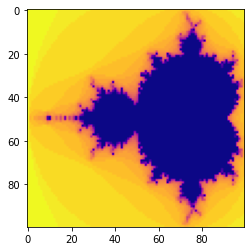

In [34]:
n= [100, 0, 0, 100]
img = plotter(n, thresh=4, max_steps=30)
plt.imshow(img, cmap="plasma")
plt.axis("on")

Probamos sobre un modelo de 100 x 100, mostrando solo el cuadrante superior derecho:

(-0.5, 49.5, 49.5, -0.5)

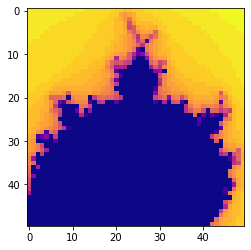

In [35]:
n= [100, 50, 0, 50] #Nos movemos 50 en x (de izquierda a derecha) y 0 en Y (de arriba a abajo)
img = plotter(n, thresh=4, max_steps=30)
plt.imshow(img, cmap="plasma")
plt.axis("on")

Generamos la visualización de los 4 cuadrantes:

In [36]:
import math 
plt.figure(figsize = (1000,1000))
detalle = 2000
sectores = 4 #Debe ser siempre divisible por 4
lado = math.sqrt(sectores)
delta = int(detalle / lado)
sec = np.arange(0, detalle, delta)

<Figure size 72000x72000 with 0 Axes>

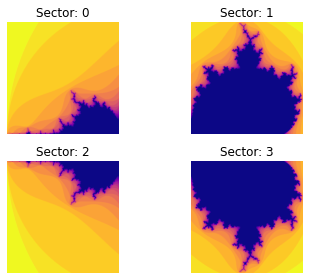

In [37]:
for i in range(sectores):
    plt.subplot(int(lado),int(lado),i+1)
    
    si = int(i/lado)
    sj = int(i%lado)
    
    n= [detalle, sec[sj], sec[si], delta]
       
    img = plotter(n, thresh=4, max_steps=20)
    
    #print('Sector: ' + str(i))
    #print('Fila: ' + str(sec[si]))
    #print('Columna: ' + str(sec[sj])) 
        
    plt.title('Sector: ' + str(i))
    plt.imshow(img, cmap="plasma")
    plt.axis("off")
    
plt.tight_layout()
plt.show()

Podemos enfocarnos en mayor nivel de detalle, por ejemplo el cuadrante superior derecho

(-0.5, 1999.5, 1999.5, -0.5)

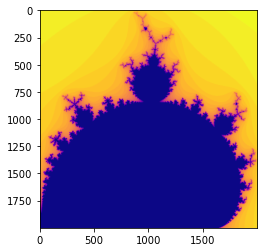

In [38]:
n= [4000, 2000, 0, 2000]
img = plotter(n, thresh=4, max_steps=40)
plt.imshow(img, cmap="plasma")
plt.axis("on")

Nuevamente, al cuadrante superior derecho

(-0.5, 1999.5, 1999.5, -0.5)

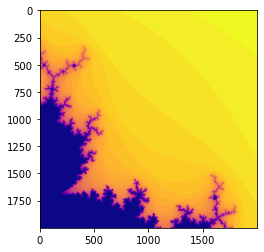

In [39]:
n= [8000, 6000, 0, 2000]
img = plotter(n, thresh=4, max_steps=40)
plt.imshow(img, cmap="plasma")
plt.axis("on")

Una vez mas, pero ahora al cuadrante inferior derecho

(-0.5, 1999.5, 1999.5, -0.5)

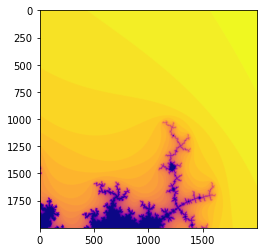

In [40]:
n= [16000, 14000, 2000, 2000]
img = plotter(n, thresh=4, max_steps=40)
plt.imshow(img, cmap="plasma")
plt.axis("on")

Una vez mas, pero ahora al cuadrante inferior derecho

(-0.5, 1999.5, 1999.5, -0.5)

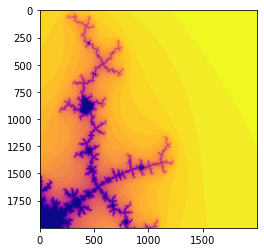

In [41]:
n= [32000, 30000, 6000, 2000]
img = plotter(n, thresh=4, max_steps=40)
plt.imshow(img, cmap="plasma")
plt.axis("on")

**Ejercicio 1**

CLASES Y OBJETOS

1. Se necesita crear la clase para el fractal de Mandelbrot
2. Los parámetros iniciales serán el largo del lado de todo el recuadro y la cantidad de iteraciones

In [42]:
class Fractal_ConjuntoM:

    def __init__(self, lado, iteraciones):
        self.Lado = lado
        self.MaxIteraciones = iteraciones
        self.SuperficieTotal = lado * lado
        self.ImagenFractal = np.full((lado,lado), 255)
        self.Thresh = 4
        
    def get_Iteracion(self, c:complex) -> int:
        # Z_(n) = (Z_(n-1))^2 + c
        # Z_(0) = c
        z=c
        i=1
        while i<self.MaxIteraciones and (z*z.conjugate()).real<self.Thresh:
            z=z*z +c
            i+=1
        return i

    def gen_ImagenFractal(self):
        mx = 2.48 / (self.Lado-1)
        my = 2.26 / (self.Lado-1)
        mapper = lambda x,y: (mx*x - 2, my*y - 1.13)

        for x in range(0, self.Lado):
            for y in range(0, self.Lado):
                it = self.get_Iteracion(complex(*mapper(x,y)))
                self.ImagenFractal[(y)][(x)] = 255 - it

In [43]:
m = Fractal_ConjuntoM(100,25)

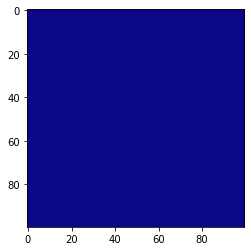

In [44]:
plt.imshow(m.ImagenFractal, cmap="plasma")

In [45]:
m.gen_ImagenFractal()

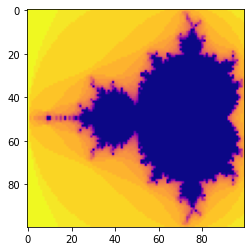

In [46]:
plt.imshow(m.ImagenFractal, cmap="plasma")

3. A la clase creada, debemos agregar un método que plotee la imagen fractal
4. La imagen del fractal debe generarse al instanciar el objeto

In [47]:
class Fractal_ConjuntoM:

    def __init__(self, lado, iteraciones):
        self.Lado = lado
        self.MaxIteraciones = iteraciones
        self.SuperficieTotal = lado * lado
        self.ImagenFractal = np.full((lado,lado), 255)
        self.Thresh = 4
        self.gen_ImagenFractal()
        
    def get_Iteracion(self, c:complex) -> int:
        # Z_(n) = (Z_(n-1))^2 + c
        # Z_(0) = c
        z=c
        i=1
        while i<self.MaxIteraciones and (z*z.conjugate()).real<self.Thresh:
            z=z*z +c
            i+=1
        return i

    def gen_ImagenFractal(self):
        mx = 2.48 / (self.Lado-1)
        my = 2.26 / (self.Lado-1)
        mapper = lambda x,y: (mx*x - 2, my*y - 1.13)

        for x in range(0, self.Lado):
            for y in range(0, self.Lado):
                it = self.get_Iteracion(complex(*mapper(x,y)))
                self.ImagenFractal[(y)][(x)] = 255 - it
                
    def plotear_Fractal(self):
        plt.imshow(self.ImagenFractal, cmap="plasma")

In [48]:
m = Fractal_ConjuntoM(1000,30)

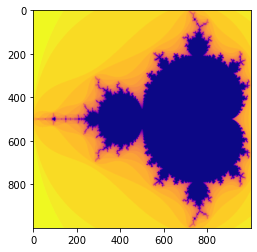

In [49]:
m.plotear_Fractal()

**Ejercicio 2**

CLASES Y OBJETOS

1. A la clase creada en el ejercicio 1, debemos agregar un método que plotee la sección solicitada del fractal completo

In [50]:
class Fractal_ConjuntoM:

    def __init__(self, lado, iteraciones):
        self.Lado = lado
        self.MaxIteraciones = iteraciones
        self.SuperficieTotal = lado * lado
        self.ImagenFractal = np.full((lado,lado), 255)
        self.Thresh = 4
        self.gen_ImagenFractal()
        
    def get_Iteracion(self, c:complex) -> int:
        # Z_(n) = (Z_(n-1))^2 + c
        # Z_(0) = c
        z=c
        i=1
        while i<self.MaxIteraciones and (z*z.conjugate()).real<self.Thresh:
            z=z*z +c
            i+=1
        return i

    def gen_ImagenFractal(self):
        mx = 2.48 / (self.Lado-1)
        my = 2.26 / (self.Lado-1)
        mapper = lambda x,y: (mx*x - 2, my*y - 1.13)

        for x in range(0, self.Lado):
            for y in range(0, self.Lado):
                it = self.get_Iteracion(complex(*mapper(x,y)))
                self.ImagenFractal[(y)][(x)] = 255 - it
                
    def plotear_Fractal(self):
        plt.imshow(self.ImagenFractal, cmap="plasma")
        
    def plotear_Sub_Fractal(self, x_inicial, y_inicial, x_delta, y_delta):
        if(x_inicial + x_delta > 100):
            print("Desplazamiento en X no permitido")
            return
        if(y_inicial + y_delta > 100):
            print("Desplazamiento en Y no permitido")
            return
            
        x_inicial = int(self.Lado * x_inicial / 100)
        y_inicial = int(self.Lado * y_inicial / 100)
        
        x_delta = int(self.Lado * x_delta / 100)
        y_delta = int(self.Lado * y_delta / 100)
        
            
        sub_imagen = np.zeros((y_delta, x_delta))

        for x in range(0, x_delta):
            for y in range(0, y_delta):
                sub_imagen[y][x]=self.ImagenFractal[(y_inicial + y)][(x_inicial + x)]
        plt.imshow(sub_imagen, cmap="plasma")

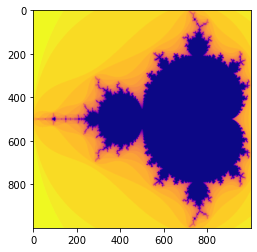

In [51]:
m = Fractal_ConjuntoM(1000,30)
m.plotear_Fractal()

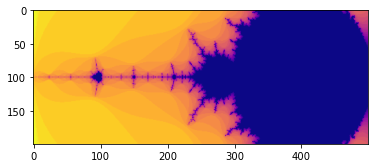

In [52]:
m.plotear_Sub_Fractal(0,40,50,20)

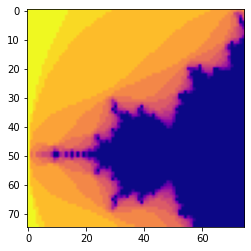

In [71]:
m.plotear_Sub_Fractal(0,0,75,75)

**Ejercicio 3**

CLASES Y OBJETOS

1. A la clase del ejercicio anterior, agregar un método que devuelva la cantidad de pixeles dentro del conjunto sobre el total.

CONSIDERACIONES

1. Para que un punto se encuentre dentro del fractal, el valor del pixel debe ser igual a 255 menos la cantidad máxima de iteraciones

In [53]:
class Fractal_ConjuntoM:
    
    def __init__(self, lado, iteraciones):
        self.Val_Max_Pixel = 255
        self.Lado = lado
        self.MaxIteraciones = iteraciones
        self.SuperficieTotal = lado * lado
        self.ImagenFractal = np.full((lado,lado), self.Val_Max_Pixel)
        self.Thresh = 4
        self.ElementosDentro = 0
        self.gen_ImagenFractal()
        
    def get_Iteracion(self, c:complex) -> int:
        # Z_(n) = (Z_(n-1))^2 + c
        # Z_(0) = c
        z=c
        i=1
        while i<self.MaxIteraciones and (z*z.conjugate()).real<self.Thresh:
            z=z*z +c
            i+=1
        return i

    def gen_ImagenFractal(self):
        mx = 2.48 / (self.Lado-1)
        my = 2.26 / (self.Lado-1)
        mapper = lambda x,y: (mx*x - 2, my*y - 1.13)
        dim = 0

        for x in range(0, self.Lado):
            for y in range(0, self.Lado):
                it = self.get_Iteracion(complex(*mapper(x,y)))
                self.ImagenFractal[(y)][(x)] = self.Val_Max_Pixel - it
                if (it == self.MaxIteraciones):
                    self.ElementosDentro+=1
        self.ElementosDentro = self.ElementosDentro / self.SuperficieTotal
                
    def plotear_Fractal(self):
        plt.imshow(self.ImagenFractal[0], cmap="plasma")

    def plotear_Sub_Fractal(self, x_inicial, y_inicial, x_delta, y_delta):
        if(x_inicial + x_delta > 100):
            print("Desplazamiento en X no permitido")
            return
        if(y_inicial + y_delta > 100):
            print("Desplazamiento en Y no permitido")
            return
            
        x_inicial = int(self.Lado * x_inicial / 100)
        y_inicial = int(self.Lado * y_inicial / 100)
        
        x_delta = int(self.Lado * x_delta / 100)
        y_delta = int(self.Lado * y_delta / 100)
                    
        sub_imagen = np.zeros((y_delta, x_delta))

        for x in range(0, x_delta):
            for y in range(0, y_delta):
                sub_imagen[y][x]=self.ImagenFractal[(y_inicial + y)][(x_inicial + x)]
        plt.imshow(sub_imagen, cmap="plasma")

In [54]:
for t in range(100, 1001, 300):
    for i in range(15, 31, 5):
        m = Fractal_ConjuntoM(t,i)
        print("Tamaño: ", t, " - Iteraciones:", i, " - % Elementos en el Conjunto:", m.ElementosDentro)

Tamaño:  100  - Iteraciones: 15  - % Elementos en el Conjunto: 0.3232
Tamaño:  100  - Iteraciones: 20  - % Elementos en el Conjunto: 0.3052
Tamaño:  100  - Iteraciones: 25  - % Elementos en el Conjunto: 0.2976
Tamaño:  100  - Iteraciones: 30  - % Elementos en el Conjunto: 0.2894
Tamaño:  400  - Iteraciones: 15  - % Elementos en el Conjunto: 0.3280125
Tamaño:  400  - Iteraciones: 20  - % Elementos en el Conjunto: 0.30955
Tamaño:  400  - Iteraciones: 25  - % Elementos en el Conjunto: 0.2997625
Tamaño:  400  - Iteraciones: 30  - % Elementos en el Conjunto: 0.2934375
Tamaño:  700  - Iteraciones: 15  - % Elementos en el Conjunto: 0.32880408163265307
Tamaño:  700  - Iteraciones: 20  - % Elementos en el Conjunto: 0.3103224489795918
Tamaño:  700  - Iteraciones: 25  - % Elementos en el Conjunto: 0.3004938775510204
Tamaño:  700  - Iteraciones: 30  - % Elementos en el Conjunto: 0.2943387755102041
Tamaño:  1000  - Iteraciones: 15  - % Elementos en el Conjunto: 0.329108
Tamaño:  1000  - Iteraciones

2. Diseñar una forma de visualizar la cantidad de iteraciones por cada pixel del proceso.

In [55]:
class Fractal_ConjuntoM:
    
    def __init__(self, lado, iteraciones):
        self.Val_Max_Pixel = 255
        self.Lado = lado
        self.MaxIteraciones = iteraciones
        self.SuperficieTotal = lado * lado
        self.ImagenFractal = np.full((lado,lado), self.Val_Max_Pixel)
        self.ImgEjeZ = np.full((lado,lado), 0)
        self.Thresh = 4
        self.ElementosDentro = 0
        self.gen_ImagenFractal()
        
    def get_Iteracion(self, c:complex) -> int:
        # Z_(n) = (Z_(n-1))^2 + c
        # Z_(0) = c
        z=c
        i=1
        while i<self.MaxIteraciones and (z*z.conjugate()).real<self.Thresh:
            z=z*z +c
            i+=1
        return i

    def gen_ImagenFractal(self):
        mx = 2.48 / (self.Lado-1)
        my = 2.26 / (self.Lado-1)
        mapper = lambda x,y: (mx*x - 2, my*y - 1.13)
        dim = 0

        for x in range(0, self.Lado):
            for y in range(0, self.Lado):
                it = self.get_Iteracion(complex(*mapper(x,y)))
                self.ImagenFractal[(y)][(x)] = self.Val_Max_Pixel - it
                self.ImgEjeZ[(y)][(x)] = it
                if (it == self.MaxIteraciones):
                    self.ElementosDentro+=1
        self.ElementosDentro = self.ElementosDentro / self.SuperficieTotal
                
    def plotear_Fractal(self):
        plt.imshow(self.ImagenFractal[0], cmap="plasma")

    def plotear_Sub_Fractal(self, x_inicial, y_inicial, x_delta, y_delta):
        if(x_inicial + x_delta > 100):
            print("Desplazamiento en X no permitido")
            return
        if(y_inicial + y_delta > 100):
            print("Desplazamiento en Y no permitido")
            return
            
        x_inicial = int(self.Lado * x_inicial / 100)
        y_inicial = int(self.Lado * y_inicial / 100)
        
        x_delta = int(self.Lado * x_delta / 100)
        y_delta = int(self.Lado * y_delta / 100)
                    
        sub_imagen = np.zeros((y_delta, x_delta))

        for x in range(0, x_delta):
            for y in range(0, y_delta):
                sub_imagen[y][x]=self.ImagenFractal[(y_inicial + y)][(x_inicial + x)]
        plt.imshow(sub_imagen, cmap="plasma")
        
    def plotear_Iteraciones3D(self):
        fig = plt.figure(figsize=(10, 10))
        ax = fig.gca(projection='3d')

        X = np.arange(0, self.Lado)
        Y = np.arange(0, self.Lado)
        X, Y = np.meshgrid(X, Y)
        Z = X.copy()

        for x in range(0, self.Lado):
            for y in range(0, self.Lado):
                Z[x,y] = (self.Val_Max_Pixel - m.ImagenFractal[y][x])

        ax.plot_surface(X, Y, Z, cmap="plasma", linewidth=0, antialiased=False)
        ax.view_init(45, 10)
        
    def plotear_scatter3D(self, a, b):
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection='3d')
        ax.set_xlabel('y', fontsize=15)
        ax.set_ylabel('x', fontsize=15)
        ax.set_zlabel('z', fontsize=15)
        for x in range(0, self.Lado):
            for y in range(0, self.Lado):
                if (self.ImgEjeZ[y,x] != self.MaxIteraciones):
                    ax.scatter(y, x, self.ImgEjeZ[y,x], s=10, c='red')
        ax.view_init(a, b)
        plt.show()

In [56]:
m = Fractal_ConjuntoM(1000,30)

C:\Users\lopez\AppData\Local\Temp/ipykernel_27048/3935757619.py:65: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


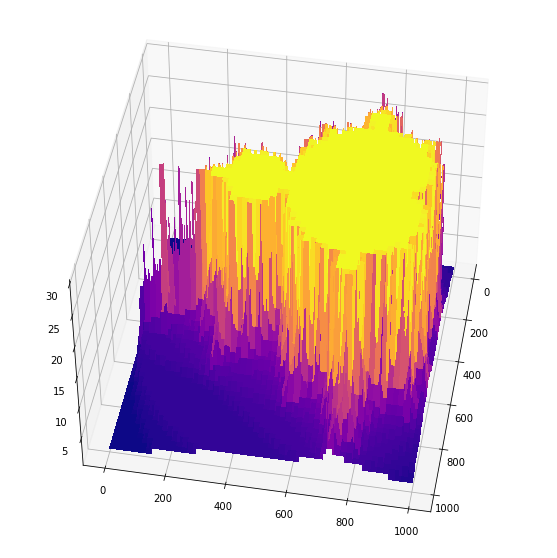

In [57]:
m.plotear_Iteraciones3D()

In [58]:
m = Fractal_ConjuntoM(100,15)

In [59]:
m.ElementosDentro

0.3232

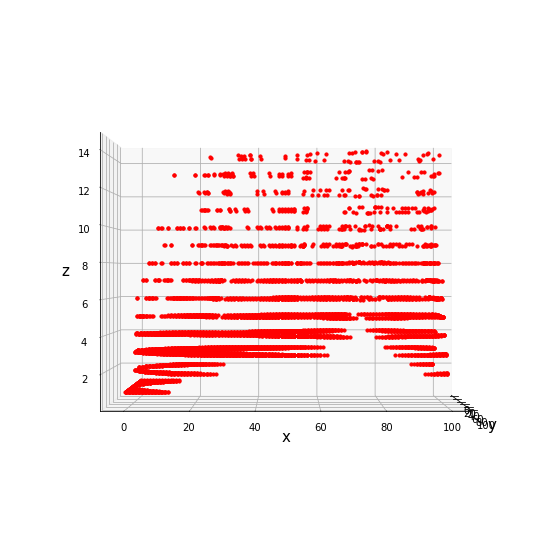

In [60]:
m.plotear_scatter3D(0,0)

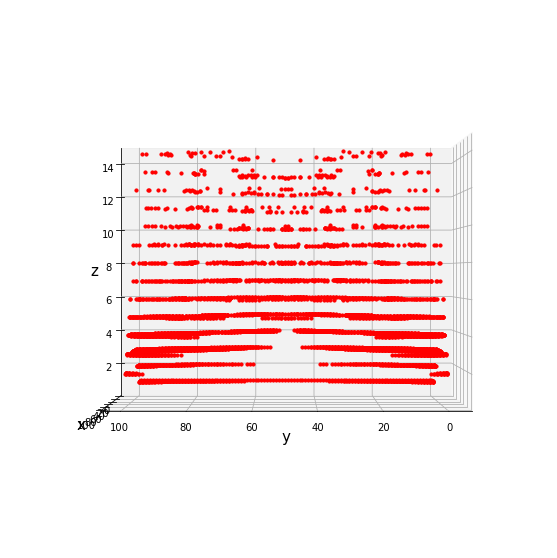

In [61]:
m.plotear_scatter3D(0,90)

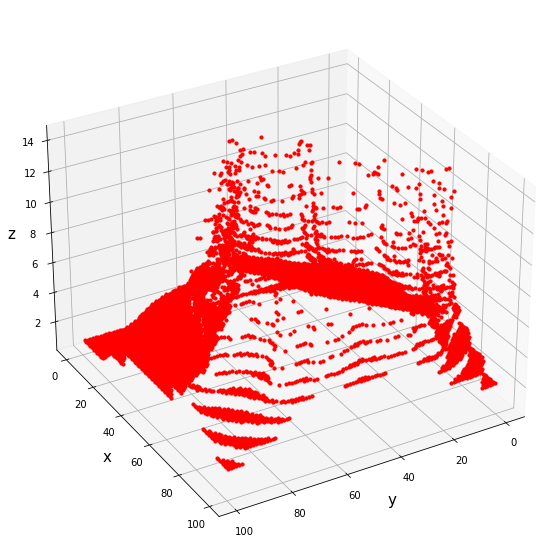

In [62]:
m.plotear_scatter3D(30,60)

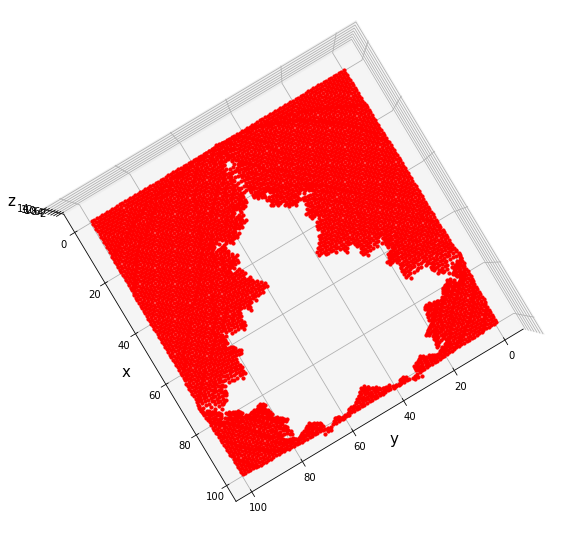

In [63]:
m.plotear_scatter3D(90,60)